In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data=pd.read_csv('/content/twitter_training.csv',header=None,names=['id','game','label','text'])
test_data=pd.read_csv(r"/content/twitter_validation.csv",header=None,names=['id','game','label','text'])

In [3]:
train_data.head()

,id,game,label,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
test_data.head()

,id,game,label,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [5]:
#plotting the labels
counts=train_data['label'].value_counts().reset_index()
counts.columns=['label','count']
print(counts)

        label  count
0    Negative  22542
1    Positive  20832
2     Neutral  18318
3  Irrelevant  12990


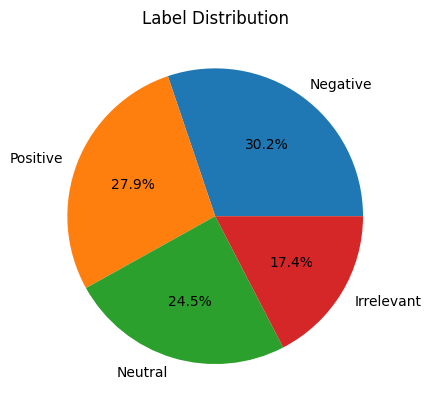

In [6]:
from matplotlib import pyplot as plt
plt.pie(counts['count'],labels=counts['label'],autopct='%1.1f%%')
plt.title('Label Distribution')
plt.show()



In [7]:
data=train_data.groupby('game')['label'].value_counts()
print(data)

game             label     
Amazon           Neutral       1236
                 Negative       576
                 Positive       312
                 Irrelevant     192
ApexLegends      Neutral        942
                               ... 
Xbox(Xseries)    Negative       378
johnson&johnson  Neutral       1014
                 Negative       846
                 Positive       270
                 Irrelevant     198
Name: count, Length: 128, dtype: int64


In [11]:
data1=data.unstack()
print(data1)


label                              Irrelevant  Negative  Neutral  Positive
game                                                                      
Amazon                                    192       576     1236       312
ApexLegends                               192       600      942       642
AssassinsCreed                            264       378      156      1446
Battlefield                               918       474      360       594
Borderlands                               240       426      600      1020
CS-GO                                     636       348      552       768
CallOfDuty                                672       894      378       450
CallOfDutyBlackopsColdWar                 576       576      360       864
Cyberpunk2077                             480       390      468       966
Dota2                                     426       768      588       582
FIFA                                      558      1176      102       504
Facebook                 

<Figure size 800x500 with 0 Axes>

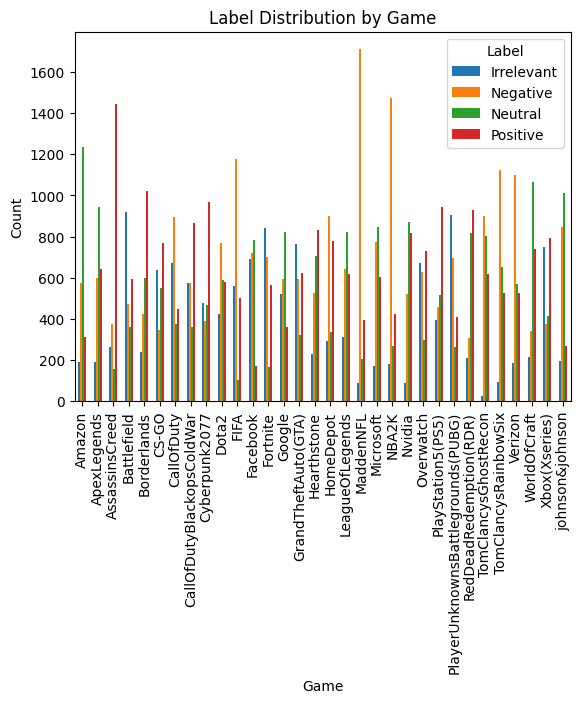

In [15]:
plt.figure(figsize=(8,5))
data1.plot(kind='bar')
plt.title('Label Distribution by Game')
plt.xlabel('Game')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

In [7]:
train_data.shape

(74682, 4)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       74682 non-null  int64 
 1   country  74682 non-null  object
 2   label    74682 non-null  object
 3   text     73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [31]:
train_data.isnull().sum()
test_data.isnull().sum()

,0
id,0
country,0
label,0
text,0


In [10]:
train_data.dropna(inplace=True)

In [11]:
train_data.shape

(73996, 4)

In [32]:
df=train_data[['text','label']]
df.head()

df_test=test_data[['text','label']]
df_test.head()

,text,label
0,I mentioned on Facebook that I was struggling ...,Irrelevant
1,BBC News - Amazon boss Jeff Bezos rejects clai...,Neutral
2,@Microsoft Why do I pay for WORD when it funct...,Negative
3,"CSGO matchmaking is so full of closet hacking,...",Negative
4,Now the President is slapping Americans in the...,Neutral


In [13]:
df['label'].value_counts()

,count
label,
Negative,22358
Positive,20655
Neutral,18108
Irrelevant,12875


In [14]:
df['text'][0]

'im getting on borderlands and i will murder you all ,'

Importing NLTK and required libraries

In [15]:
import nltk

In [16]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [17]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [18]:
punct=set('''!()-[]{};:'"\,<>./?@#$%^&*_~''')

<>:1: SyntaxWarning: invalid escape sequence '\,'
<>:1: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipython-input-1602833150.py:1: SyntaxWarning: invalid escape sequence '\,'
  punct=set('''!()-[]{};:'"\,<>./?@#$%^&*_~''')


In [19]:
def preprocess(text):
  text=text.lower()
  tokens=word_tokenize(text)
  lemmatizer=WordNetLemmatizer()
  lemmatized_tokens=[lemmatizer.lemmatize(token) for token in tokens]
  stop_words=set(stopwords.words('english'))
  cleaned_tokens=[word for word in lemmatized_tokens if word not in stop_words and word not in punct]
  return ' '.join(cleaned_tokens)

In [33]:
df['text']=df['text'].apply(preprocess)

/tmp/ipython-input-4202221109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text']=df['text'].apply(preprocess)
/tmp/ipython-input-4202221109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['text']=df_test['text'].apply(preprocess)


In [34]:
df.head()
df_test.head()

,text,label
0,mentioned facebook wa struggling motivation go...,Irrelevant
1,bbc news amazon bos jeff bezos reject claim co...,Neutral
2,microsoft pay word function poorly samsungus c...,Negative
3,csgo matchmaking full closet hacking 's truly ...,Negative
4,president slapping american face really commit...,Neutral


In [35]:
#vectorize the text
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
#encoding of label
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])
df_test['label']=le.transform(df_test['label'])
print(df.head())
print(df_test.head())

                             text  label
0    im getting borderland murder      3
1              coming border kill      3
2      im getting borderland kill      3
3     im coming borderland murder      3
4  im getting borderland 2 murder      3
                                                text  label
0  mentioned facebook wa struggling motivation go...      0
1  bbc news amazon bos jeff bezos reject claim co...      2
2  microsoft pay word function poorly samsungus c...      1
3  csgo matchmaking full closet hacking 's truly ...      1
4  president slapping american face really commit...      2


/tmp/ipython-input-841767323.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label']=le.fit_transform(df['label'])
/tmp/ipython-input-841767323.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['label']=le.transform(df_test['label'])


In [37]:
from sklearn.model_selection import train_test_split

In [40]:
x_train=df['text']
y_train=df['label']
x_test1=df_test['text']
y_test1=df_test['label']
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [41]:
tfidf=TfidfVectorizer(max_features=5000)
X_train1=tfidf.fit_transform(x_train).toarray()
y_train1=y_train.values
x_test1=tfidf.transform(x_test1).toarray()
y_test1=y_test1.values

x_test=tfidf.transform(x_test).toarray()
y_test=y_test.values

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [43]:
models={'naive_bayes': MultinomialNB(),
        'random_forest': RandomForestClassifier()  }

In [44]:
for model_name,model in models.items():
  pipeline=Pipeline([('classifier',model)])
  pipeline.fit(X_train1,y_train1)
  y_pred=pipeline.predict(x_test)
  y_pred_test=pipeline.predict(x_test1)
  accuracy=accuracy_score(y_test,y_pred)
  accuracy_test=accuracy_score(y_test1,y_pred_test)
  print(f"{model_name} Accuracy: {accuracy}")
  print(classification_report(y_test,y_pred))
  print(f"{model_name} Accuracy: {accuracy_test}")
  print(classification_report(y_test1,y_pred_test))

naive_bayes Accuracy: 0.6356081081081081
              precision    recall  f1-score   support

           0       0.76      0.33      0.46      2696
           1       0.62      0.81      0.70      4380
           2       0.66      0.54      0.59      3605
           3       0.61      0.74      0.67      4119

    accuracy                           0.64     14800
   macro avg       0.66      0.60      0.61     14800
weighted avg       0.65      0.64      0.62     14800

naive_bayes Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.84      0.50      0.63       172
           1       0.64      0.82      0.72       266
           2       0.75      0.60      0.67       285
           3       0.68      0.81      0.74       277

    accuracy                           0.70      1000
   macro avg       0.73      0.68      0.69      1000
weighted avg       0.72      0.70      0.69      1000

random_forest Accuracy: 0.8891216216216217
              precis